# Exercise 4 [Cart-Pole Model]

In [106]:
# a few packages we need to import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import IPython

# Problem
We are interested in computing a linear optimal control law to stabilize the cart pole system when subjected to small
deviations from the rest position (when $x=0$, $v=0$, $\theta = \pi$ and $\omega = 0$)

<img src="cart_pole.png" alt="drawing" width="400"/>

The dynamic equations of the Cart-Pole model are written as
$$\begin{eqnarray} \dot{x} &=& v \\ 
\dot{v} &=& \frac{f + m_p \sin\theta (l \omega^2 + g \cos \theta)}{m_c + m_p \sin^2 \theta} \\
\dot{\theta} &=& \omega \\
\dot{\omega} &=& \frac{-f\cos\theta -m_p l \omega^2 \cos\theta\sin\theta - (m_c + m_p)g \sin\theta}{l(m_c + m_p \sin^2 \theta)}
\end{eqnarray}$$

which we discretize using a time step $\Delta t$
$$ \begin{eqnarray} 
x_{n+1} &=& x_n + \Delta t\cdot v_n \\ 
v_{n+1} &=& v_n + \Delta t \cdot \left( \frac{f_n + m_p \sin\theta_n (l \omega_n^2 + g \cos \theta_n)}{m_c + m_p \sin^2 \theta_n} \right)\\
\theta_{n+1} &=& \theta_n + \Delta t \cdot \omega_n \\
\omega_{n+1} &=& \omega_n + \Delta t \cdot \left( \frac{-f_n\cos\theta_n -m_p l \omega_n^2 \cos\theta_n\sin\theta_n - (m_c + m_p)g \sin\theta_n}{l(m_c + m_p \sin^2 \theta_n)}\right)
\end{eqnarray}$$

This is the equations we use to simulate the dynamics of the system below

## Simulation of the Cart-Pole model and display functions

In [110]:
def simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81):
    """
    This function integrates the cart-pole system (the nonlinear system) for horizon_length steps
    
    Arguments:
    x0: numpy vector, initial value for the system (4 numbers for x,v,theta,omega)
    K: a list of control gains (of length horizon_length)
    uff: a list of feedforward control inputs such that the control will be f[i]=K[i] * x[i] + uff[i]
    horizon_length: lenght of the horizon to integrate
    
    Returns:
    x a numpy array containing the integration result
    u a numpy array containing the control at each step
    """
    delta_t = 0.01
        
    x=np.empty([4, horizon_length+1])
    x[:,0] = x0
    
    u=np.empty([horizon_length])

    for i in range(horizon_length):
        u[i] = K[i].dot(x[:,i]) + uff[i]
        dx = np.array([x[1,i],
                      (u[i] + mp*np.sin(x[2,i])*(l*(x[3,i]**2) + g * np.cos(x[2,i])))/(mc+mp*np.sin(x[2,i])**2),
                      x[3,i],
                      (-u[i]*np.cos(x[2,i])-mp*l*(x[3,i]**2)*np.cos(x[2,i])*np.sin(x[2,i])-(mp+mc)*g*np.sin([x[2,i]]))/(l*(mc+mp*np.sin(x[2,i])**2))
                       ])
        x[:,i+1] = x[:,i] + delta_t * dx
    return x, u

In [111]:
def animate_cart_pole(x):
    """
    This function makes an animation showing the behavior of the cart-pole
    takes as input the result of a simulation
    """
    
    #subsample
    plotx = x[:,0::5]
    
    fig = matplotlib.figure.Figure(figsize=[6,2.3])
    matplotlib.backends.backend_agg.FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=[-3,3], ylim=[-1.,1.3])
    ax.grid()
    
    list_of_lines = []
    
    #create the cart pole
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    
    cart_length = 0.5
    cart_height = 0.25
    
    def animate(i):
        for l in list_of_lines: #reset all lines
            l.set_data([],[])
        
        x_back = plotx[0,i] - cart_length
        x_front = plotx[0,i] + cart_length
        y_up = cart_height
        y_down = 0.
        x_pend = plotx[0,i] + np.sin(plotx[2,i])
        y_pend = cart_height - np.cos(plotx[2,i])
        
        list_of_lines[0].set_data([x_back, x_front], [y_down, y_down])
        list_of_lines[1].set_data([x_front, x_front], [y_down, y_up])
        list_of_lines[2].set_data([x_back, x_front], [y_up, y_up])
        list_of_lines[3].set_data([x_back, x_back], [y_down, y_up])
        list_of_lines[4].set_data([plotx[0,i], x_pend], [cart_height, y_pend])
        
        return list_of_lines
    
    def init():
        return animate(0)


    ani = animation.FuncAnimation(fig, animate, np.arange(0, len(plotx[0,:])),
        interval=50, blit=True, init_func=init)
    plt.close(fig)
    plt.close(ani._fig)
    IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))

## Example simulation
Example of a simulation of the cart-pole without any control input
here we set the control gains to be 0 and uff to be 0 as well

<IPython.core.display.Javascript object>


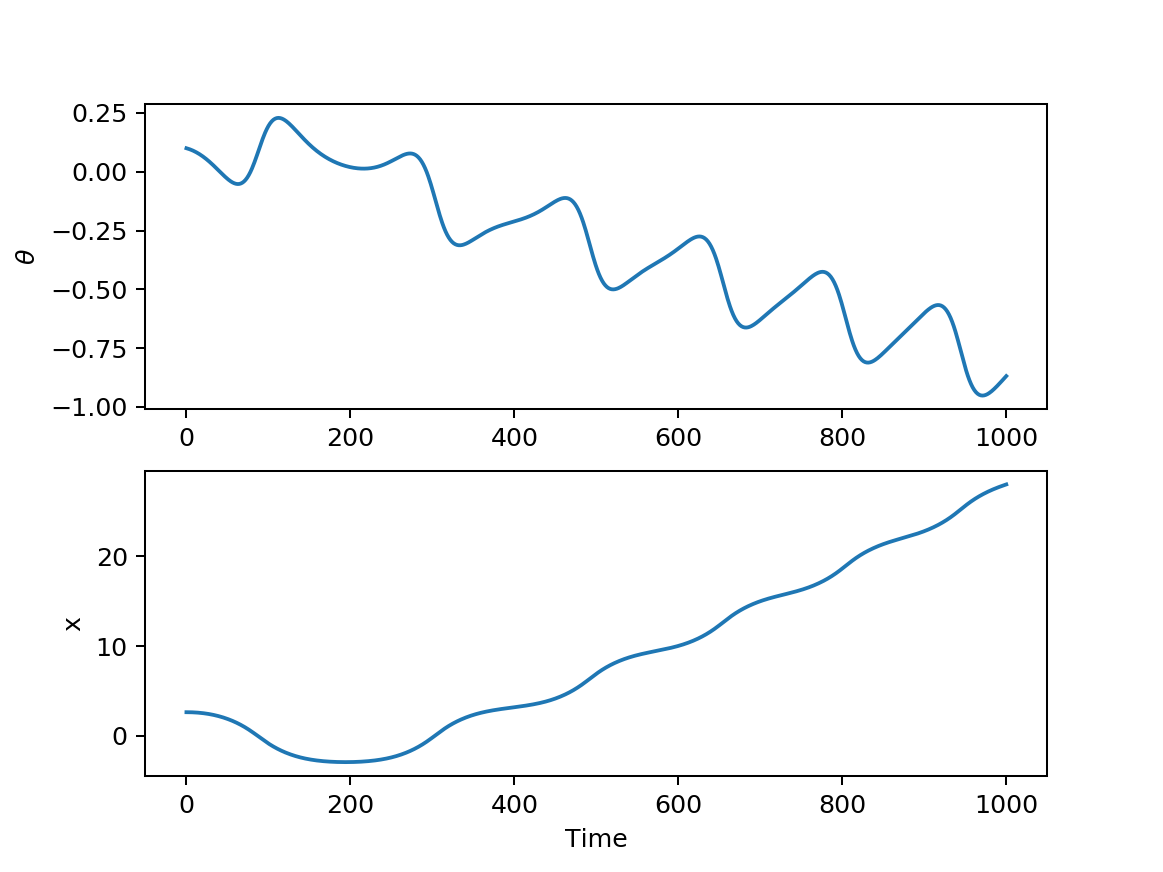

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAADBZm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NyBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAv8ZYiE
ADv//vdOvwKbRZdqA5JXCvbKpCZZuVJrAfKmAAADAAADAAADAtr0eKCHw9Nt/MBDWD+/sM+OkJo2
5XPXr4JdXQwTgxWTZ482wNKaLACXPz3AHMPiS+Cyw5SjDpyHlVfRJU+imQW/9Cdo4LILxlvcA9ZX
zsbPlaSD08zFBQ+6bA4REaNyfMRPFim40IJL5TlEMjhLiITgapYPPDyZpMekv3yx2BItZiUhiT/s
ujCb86KFyvrzR/pdYLxGuC88IewlxgoYAUp2WOfOE9PurgZYthAqrpZ6uZU4gDP59ZELfUlbxqSo
QlTBTuuY5ZOdLXhopWf7u2wD14FbxFCZkhkiGCPD2OCr2bnXEQh0d2YuTpyUAB5hoJ5zfgFS9Jn0
Sc7FLjxe0EuczRW4bYj74Wui97GcGm4pPPlGAnS/SBcEe2uXn7Mv/h5CWO4n8MCEORR10iEaZTzQ
cSv+qUNwJAACZkk5wXwE5Du7LOQvYAKmwZPm6x2oZNgQ19wrW+ZeXXiolM8UzbXxzLGoLSPM/umF
qbdQzEnyqMLWW7y1L1IYtUMk0iTfVJGSUv80pV6lq3EMd/1N25FR0Y5zWU2cCBrKMcSf1UJrCTGC
I1Did5X/MSUgPjAOfbBAt7HbvpnfzG+2VMM2Qd2j+EFdOq+B+pJjiwGA2hFRqMhaW5Cn9CqvBeuo
VlNtFh/OwWaBf2p48V7gq1Z59fK2H1l5JTOKXJmTWFK3vm4TqSyVuZE7dSI2BYTsRsvzG23s3z/o
yPh+GV6Aq0VjtuTvLdJChH2zKOWdEGnHgdEdAmShR8HUmnL6lRRGyBK/AMNBO+TytnjCVUJfBJ8J
RrwLLSjvPkKmvQWUdUq2QQSBQ0RDgAEjfxIPhBxiz6KxEgP5hkTcea7TOTo+2xVDWYngoDQhao+L
L/2FHKJdqGs5wps+HcuU6y69UZUrg3nWjeabo2O0vWBOeDG7iFzHZkDc/QCx3KX0VZPF50fffFTQ
yhZ/zJAomtL7DerD/OzCrISDWUVDzS+U12jQEt3Ydtu3olZ8Jh1c/XAcS5DA8M5+8q+2lCQrNpmm
L3LznO+uBaew2NVXSb68Bw1xQ/irndnCPzweFIN5nGD9I978EyEto6v8z9CR8wJSDkEWyd9922lI
ZNNz2nRaK1FbflJad1zzWVRw8y6jVZMxJIZ9bMz9beXVnDdK+P/jpuchaz8wl5kFe5g1SNLBP3Wn
ZUqvhQRL0y60JEOQUVADiJt9Yt/itVEeSUwtZYDLYn+bgIV7P9CQADM8QhXwxwdYem0Xbm9mIyGj
mSAdfI5S8p/KIfaK592mfdov+5stD4Vq5tW7ikjct/ZuGxvqU/vtgfOr5BN3e4mXW+DBIupd9CQi
w3BHYu8wUzjdOTH2ESh5IasVMJqb0bhQd/H9r+5708b4A6U3AQip/EbQAAXrZv9/YvO0VXPR776z
yAUVf1FHsXFLyHwERurd5WNgqKkz4wVW3H2bDJZmwLhP+BB18Jgi+A/xQHmox+DpxbEuWjlm7QPc
vQLZll0JxquGg3TbzWvCAhoN9OExTaNr+d4fWpWTDNknckpSF30OOR/Y1NilnjOFmy1mHbEFoLC1
JR0/qJw/Hj+pO2dYhiLgldkTmkW1Y7HtmQF10a7V6p4e5x03uBx4bB4+nmf3RI55yfLvvwPn20FP
xiQNsotZwNNaf6ilaV+RF+JTtVOWlKx5nm0XABQ9Qz1kJmODFWn9TOeGIFepVwJShsuTyzfrEV9i
PyD5ZbgqffBWACqbdpwKEBby1bLLbziG5s0/QkQAgTDFZQCyOyVygxF28OnJo/VVChdskqom+tGF
BO8GRHwnaGlCGZ6M87lMGhtN/Bfome67wczkeS+/tH/JDY6jX+kTaHX37d0NOdch8tE5Ul/H6zry
dQogapsAkNSyvyPKCBjEGislKqhYyaIdbZMYR2MvMazo71nxHnjuCsa1ELIzKC2gysGITjO8VdFO
mROKXhMZ+7XAAP1jRQ8qtWaXCMi2r5nExHHilB6QSn3Q7DBJNAY1s1+G/mJFFE1Fiz2GItT+rdvr
gAHLiVylsFnlsOiNz0UZG1MFOY7ytgBVadx9pnb48rfPaK1d6+dACGAiFSl9yIFEyJf5wwQmjbs4
2LHSWWPYi23VsYGkSHUqSi8KqBclvqz52A9YYj5AADInuVk8wVvG+Gm54LaAMIcvvK+MOtVYNH1b
bN7gfQ1gzoCoB1mEYXZ1KpjzhWKr+toFQjwk8/jDel8xokocIALuRD2ONa/RVCTCrdxE5hfPRFlz
cEkbQ8egmK5XVCptF5gH24UMUW6bZi5frAXR35ZvBOpgeiIK+3dCISdzcrWfMA3QNU2C1NUOjCu9
d46ROc/HQoP/MR22kUP74UL3zShIYaHxzkXlNDXWeg5GPKmRdgTBengPiwd6e8xYslU12xF8jqlI
xVYzbJnl0udY7ner7EJAhszJVB7iFjO4ZmSfQBlKzQg/s3hKt+fsXBo3YhnK/qCCc/xYUT+4O05V
EERaLox9aP3Rs2OTPkn8HVvyAve/7iYuMTQG2+oYYeD7joit6rECJRaWrnCirncplsXDYeUAhhDX
htYnYUqBEMP2fV232cWOZ/WttLDfoLCCeYx0uKrBCuZHbjnlxXlggzi9Z2Np8kJ/gk/ULzJo9DOw
fzKhcNeDk1hs+vLvcnxDePQhFDu1edgAAepukt4MWwDLUtqOIm04O0n+0/f6QK2t84qtSmENVBnO
QhgONmviHr1fJ/Laks/bp5PbnUAr3uZjfskLQ02sZnvYzBhfBOUTfnS0VZNm3sOCYtRuTh+kXZNV
wrkRpfaNt0uBS3aI5/H/b+knSmQ/l9g4XlCGi4KCjytUr7uHRWKHRFz86qaoYd2TF66wbchgvYA5
PXPUWPZJ8vHYrE4VVgsNx

In [109]:
horizon_length = 1000 #this will simulate 10 seconds (since deltat = 0.01)

# here we set gains to 0
K = [np.array([0,0.,0,0])]
K = K*horizon_length
uff = [0.]
uff = uff*horizon_length

# initial conditions
x0 = np.array([0.1,-0.1,np.pi-0.5,0.])

# we simulate the system
mp=1.
mc=5.
l=1.
g=9.81
x,u = simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81)

# plot x and theta as a function of time
plt.figure()
plt.subplot(2,1,1)
plt.plot(x[0,:])
plt.ylabel(r'$\theta$')
plt.subplot(2,1,2)
plt.plot(x[2,:])
plt.ylabel('x')
plt.xlabel('Time')

# make an animation of the cart-pole
animate_cart_pole(x)

# Question 1
Linearize the discretized equations of the Cart-Pole Model around the resting position $\bar{x}=0$, $\bar{v}=0$, $\bar{\theta}=\pi$ and $\bar{\omega}=0$, $\bar{f}=0$ and write the dynamic equations in the form 

$$ \begin{bmatrix} \tilde{x}_{n+1} \\ \tilde{v}_{n+1} \\ \tilde{\theta}_{n+1} \\ \tilde{\omega}_{n+1} \end{bmatrix} = A \begin{bmatrix} \tilde{x}_{n} \\ \tilde{v}_{n} \\ \tilde{\theta}_{n} \\ \tilde{\omega}_{n} \end{bmatrix} + B \tilde{f}_n$$

where $A$ and $B$ are matrices of appropriate size and $\tilde{x}_n = x_n - \bar{x}$, $\tilde{v}_n = v_n - \bar{v}$, $\tilde{\theta}_n = \theta_n - \bar{\theta}$, $\tilde{\omega}_n = \omega_n - \bar{\omega}$ and $\tilde{f}_n = f_n - \bar{f}$. Remember that the resting position is a fixed point, i.e.

$$ \begin{bmatrix} \bar{x} \\ \bar{v} \\ \bar{\theta} \\ \bar{\omega} \end{bmatrix} = f(\bar{x}, \bar{v}, \bar{\theta}, \bar{\omega},  \bar{f})$$
where $f$ is the discretized dynamic equation of the Cart-Pole Model

# Question 2
We would like to use the linearized equation to compute an optimal controller that stabilizes the system around the resting position. 
1. Write a cost function that will help stabilize the resting position (be precise with the variables you use).
2. How would you (approximately) solve this optimal control problem?
3. What will be the form of the optimal controller $f_n$ (remember that the linearized system will give you $\tilde{f}_n$)?

# Question 3
1. Write a function (e.g. take example from Exercise 3) that computes the optimal control for the linearized problem. 2. Simulate the dynamics of the Cart-Pole Model with the computed controller for initial conditions $x=0.2$, $v=0.1$, $\theta=\pi-0.2$ and $\omega=0$. What happens? (show a plot of the states of the system and the cart-pole animation)
3. How can you change the response of the  system (how fast it stabilizes)? Give an example with a simulation.
4. Does the controller still work when $x=0.2$, $v=0.1$, $\theta=0.2$ and $\omega=0$? Why? (show a plot of the states of the system and the cart-pole animation, use a smaller horizon if necessary)